In [1]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
folder_stickers = r'C:/Users/gjoling/Documents/2122/Advanced Network Security/stickers/'
folder_encrypted = r'C:/Users/gjoling/Documents/2122/Advanced Network Security/modifiedimages/'

In [19]:
def convert_image(image, outfile):
    img = Image.open(image)
    conv = img.convert("RGBA")
    img.close()
    conv.save(outfile)

def collect_statistics(image):
    img = Image.open(image)
    (width, height) = img.size
    conv = img.convert("RGBA").getdata()
    total_pixels = width*height
    total_pixels2 = 0
    nr_r1 = 0
    nr_g1 = 0
    nr_b1 = 0
    for h in range(height):
        for w in range(width):
            (r, g, b, a) = conv.getpixel((w, h))
            total_pixels2 += 1
            if(r & 1 == 1):
                nr_r1 += 1
            if(g & 1 == 1):
                nr_g1 += 1
            if(b & 1 == 1):
                nr_b1 += 1
    assert total_pixels == total_pixels2
    return nr_r1/total_pixels, nr_g1/total_pixels, nr_b1/total_pixels
            
def collect_all_statistics(folder):
    files = os.listdir(folder)
    #fractions of pixels being 1
    r1_fractions = []
    g1_fractions = []
    b1_fractions = []
    for file in files:
        r1_fraction, g1_fraction, b1_fraction = collect_statistics(folder + file)
        r1_fractions.append(r1_fraction)
        g1_fractions.append(g1_fraction)
        b1_fractions.append(b1_fraction)
    mean_r1 = np.mean(r1_fractions)
    mean_g1 = np.mean(g1_fractions)
    mean_b1 = np.mean(b1_fractions)
    std_r1 = np.std(r1_fractions)
    std_g1 = np.std(g1_fractions)
    std_b1 = np.std(b1_fractions)
    return r1_fractions, g1_fractions, b1_fractions, mean_r1, mean_g1, mean_b1, std_r1, std_g1, std_b1   
        
def isSafePixel(img, x: int, y: int) -> bool:
            #range is how much we want to look ahead of pixels
            range = 10
            width = img.size[0]
            height = img.size[1]
            #Checks if pixel is not out of bounds of image
            if(x < range):
                return False
            if(y < range):
                return False
            if(x > width - range - 1):
                return False
            if(y > height - range - 1):
                return False
            img_data = img.getpixel((x, y))
            if(img.mode == 'RGBA'):
            #check directions
                ur, ug, ub, a1 = img.getpixel((x,y-1))
                lr, lg, lb, a2 = img.getpixel((x-1,y))
                dr, dg, db, a3 = img.getpixel((x,y+1))
                rr, rg, rb, a4 = img.getpixel((x+1,y))
                r1, g1, b1, a5 = img.getpixel((x+1,y))
                r2, g2, b2, a6 = img.getpixel((x+2,y))
                r3, g3, b3, a7 = img.getpixel((x+3,y))
                r4, g4, b4, a8 = img.getpixel((x+4,y))
                r5, g5, b5, a9 = img.getpixel((x+5,y))
                r6, g6, b6, a10 = img.getpixel((x+6,y))
                r7, g7, b7, a11 = img.getpixel((x+7,y))
                r8, g8, b8, a12 = img.getpixel((x+8,y))
                r9, g9, b9, a13 = img.getpixel((x+9,y))
                r10, g10, b10, a14 = img.getpixel((x+10, y))
            else:
                ur, ug, ub = img.getpixel((x,y-1))
                lr, lg, lb = img.getpixel((x-1,y))
                dr, dg, db = img.getpixel((x,y+1))
                rr, rg, rb = img.getpixel((x+1,y))
                r1, g1, b1 = img.getpixel((x+1,y))
                r2, g2, b2 = img.getpixel((x+2,y))
                r3, g3, b3 = img.getpixel((x+3,y))
                r4, g4, b4 = img.getpixel((x+4,y))
                r5, g5, b5 = img.getpixel((x+5,y))
                r6, g6, b6 = img.getpixel((x+6,y))
                r7, g7, b7 = img.getpixel((x+7,y))
                r8, g8, b8 = img.getpixel((x+8,y))
                r9, g9, b9 = img.getpixel((x+9,y))
                r10, g10, b10 = img.getpixel((x+10, y))
            lsb_r1 = r1 & 1
            lsb_g1 = g1 & 1
            lsb_b1 = b1 & 1
            lsb_r2 = r2 & 1
            lsb_g2 = g2 & 1
            lsb_b2 = b2 & 1
            lsb_r3 = r3 & 1
            lsb_g3 = g3 & 1
            lsb_b3 = b3 & 1
            lsb_r4 = r4 & 1
            lsb_g4 = g4 & 1
            lsb_b4 = b4 & 1
            lsb_r5 = r5 & 1
            lsb_g5 = g5 & 1
            lsb_b5 = b5 & 1
            lsb_r6 = r6 & 1
            lsb_g6 = g6 & 1
            lsb_b6 = b6 & 1
            lsb_r7 = r7 & 1
            lsb_g7 = g7 & 1
            lsb_b7 = b7 & 1
            lsb_r8 = r8 & 1
            lsb_g8 = g8 & 1
            lsb_b8 = b8 & 1
            lsb_r9 = r9 & 1
            lsb_g9 = g9 & 1
            lsb_b9 = b9 & 1
            lsb_r10 = r10 & 1
            lsb_g10 = g10& 1
            lsb_b10= b10 & 1
            lsb_ug = ug & 1
            lsb_ub = ub & 1
            lsb_ur = ur & 1
            lsb_lr = lr & 1
            lsb_lg = lg & 1
            lsb_lb = lb & 1
            lsb_dr = dr & 1
            lsb_dg = dg & 1
            lsb_db = db & 1
            lsb_rr = rr & 1
            lsb_rg = rg & 1
            lsb_rb = rb & 1
            #bool1 = (lsb_r1 is lsb_r2 is lsb_r3 is lsb_r4) and (lsb_g1 is lsb_g2 is lsb_g3 is lsb_g4) and (lsb_b1 is lsb_b2 is lsb_b3 is lsb_b4)
            #bool2 = (lsb_ug is lsb_lg is lsb_dg is lsb_rg) and (lsb_ur is lsb_lr is lsb_dr is lsb_rr) and (lsb_ub is lsb_lb is lsb_db is lsb_rb)
            if((lsb_ur is lsb_lr is lsb_dr is lsb_rr) and (lsb_ug is lsb_lg is lsb_dg is lsb_rg) and (lsb_ub is lsb_lb is lsb_db is lsb_rb)):
                return False
            if(((lsb_r1 is lsb_r2) or (lsb_r3 is lsb_r4) or (lsb_r5 is lsb_r6) or (lsb_r7 is lsb_r8) or (lsb_r9 is lsb_r10))
               and((lsb_g1 is lsb_g2) or (lsb_g3 is lsb_g4) or (lsb_g5 is lsb_g6) or (lsb_g7 is lsb_g8) or (lsb_g9 is lsb_g10))
               and((lsb_b1 is lsb_b2) or (lsb_b3 is lsb_b4) or (lsb_b5 is lsb_b6) or (lsb_b7 is lsb_b8) or (lsb_b9 is lsb_b10))):
                return False
            else:
                return True

def coordinateToPixelNumber(x, y, img):
    """
    Converts coordinates to pixel number.
    Ex: Image size is w=10, h=20
    pixel (3, 2) is the 23th pixel.
    """
    return int(y*img.size[0]+x)            
            
def filterAvailable(AVAILABLE, BLOCKLEN=10):
    """
    Takes a list of available coordinates for LSB manipulation, and removes coordinates
    which are closer then BLOCK_LEN to each other.
    This is necessary because each available pixel will have a block appended to it,
    which may not overlap
    """
    if(len(AVAILABLE) != 0):
        AVAILABLE = sorted(AVAILABLE)
        removedlist = []
        removedlist.append(AVAILABLE[0])
        lastappended = AVAILABLE[0]
        i = 1
        while(i < len(AVAILABLE)):
            curr = AVAILABLE[i]
            if(curr >= lastappended + BLOCKLEN):
                lastappended = curr
                removedlist.append(curr)
                i = i + 1
            else:
                i = i + 1
        return removedlist
    else:
        return []
    
def count_capacities(image):
    img = Image.open(image)
    (width, height) = img.size
    conv = img.convert("RGBA").getdata()
    ctr_a = 0
    AVAILABLE = []
    for w in range(width):
        for h in range(height):
            (r, g, b, a) = conv.getpixel((w, h))
            #print(a)
            if(a == 0):
                ctr_a += 1
            if(isSafePixel(img, w, h)):
                AVAILABLE.append(coordinateToPixelNumber(w, h, img))
    img.close()
    capacity = ctr_a*3
    return capacity, len(filterAvailable(AVAILABLE))
    
def inspect_lsb(image):
    img = Image.open(image)
    (width, height) = img.size
    conv = img.convert("RGBA").getdata()
    enhanced_image = []
    for h in range(height):
        enh_row = []
        for w in range(width):
            rgba = []
            (r, g, b, a) = conv.getpixel((w, h))
            if(r & 1 == 1):
                rgba.append(255)
            else:
                rgba.append(0)
            if(g & 1 == 1):
                rgba.append(255)
            else:
                rgba.append(0)
            if(b & 1 == 1):
                rgba.append(255)
            else:
                rgba.append(0)
            rgba.append(a)
            enh_row.append(rgba)
        enhanced_image.append(enh_row)
    enhanced_image = np.array(enhanced_image)
    im = Image.fromarray(np.uint8(enhanced_image))
    display(im)
            
def analyse(in_file):
    BS = 80 # Block size 
    img = Image.open(in_file)
    
    (width, height) = img.size
    print("[+] Image size: %dx%d pixels." % (width, height))
    conv = img.convert("RGB").getdata()

    # Extract LSBs
    vr = []	# Red LSBs
    vg = []	# Green LSBs
    vb = []	# LSBs
    for h in range(height):
        for w in range(width):
            (r, g, b) = conv.getpixel((w, h))
            vr.append(r & 1)
            vg.append(g & 1)
            vb.append(b & 1)
    # Average colours' LSB per each block
    avgR = []
    avgG = []
    avgB = []
    for i in range(0, len(vr), BS):
        avgR.append(np.mean(vr[i:i + BS]))
        avgG.append(np.mean(vg[i:i + BS]))
        avgB.append(np.mean(vb[i:i + BS]))

    # Nice plot 
    numBlocks = len(avgR)
    blocks = [i for i in range(0, numBlocks)]
    plt.axis([0, len(avgR), 0, 1])
    plt.ylabel('Average LSB per block')
    plt.xlabel('Block number')

    plt.plot(blocks, avgR, 'r.')
    #plt.plot(blocks, avgG, 'g')
    #plt.plot(blocks, avgB, 'bo')
    plt.show()
    
def calculate_capacities():
    files = os.listdir(r'C:\Users\gjoling\Documents\2122\Advanced Network Security\stickers')
    capacities = []
    capacities_lps = []
    for file in files:
        print(file)
        cap, cap_lps = count_capacities(folder_stickers + file)
        capacities.append(cap)
        capacities_lps.append(cap_lps)
        
    return capacities, capacities_lps

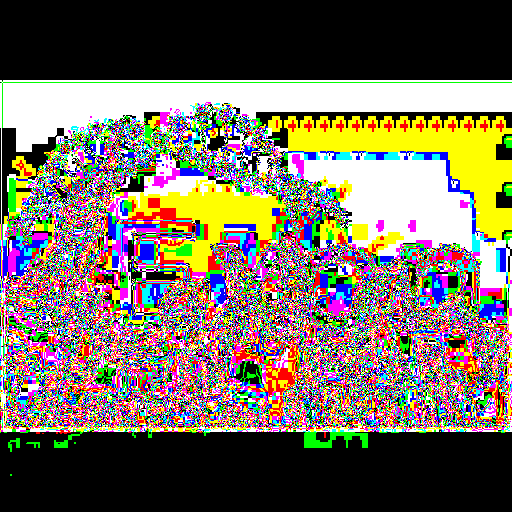

In [29]:
inspect_lsb(r'C:\Users\gjoling\Documents\2122\Advanced Network Security\alpha_visual_hide\out.png')